# AITU PROJECT CHALLENGE
### Абдрахманов Ренат(BDA-1903), Керимбек Иманғали(BDA-1904), Есенгелді Нұрдаулет(BDA-1904)

### Ментор: Касымханов Самат

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from haversine import haversine, Unit
import datetime

In [2]:
df = pd.read_csv('2_5451964703095916814.csv')

In [3]:
df

,guid,datetime,latitude,longitude
0,712070869093788000,12/8/20 17:14,51.165747,71.453509
1,11686700327246500000,12/8/20 17:15,51.151115,71.426902
2,2105413917665240000,12/8/20 17:15,51.181148,71.404782
3,3462092866854250000,12/8/20 17:15,51.136498,71.415772
4,7700733881961110000,12/8/20 17:15,51.143693,71.411055
...,...,...,...,...
387017,9642416086154050000,12/13/20 11:01,51.176601,71.418422
387018,2185211928349050000,12/13/20 11:01,51.129236,71.409150
387019,403674413556996000,12/13/20 11:02,51.117594,71.401256
387020,11277932757697900000,12/13/20 11:02,51.142655,71.487506


In [4]:
df['day'] = [x.split('/')[1] for x in df['datetime']]
df['hour'] = [x.split()[1].split(':')[0] for x in df['datetime']]
df['minute'] = [x.split()[1].split(':')[1] for x in df['datetime']]
df['day'] = df['day'].astype(int)
df['hour'] = df['hour'].astype(int)
df['minute'] = df['minute'].astype(int)

## Определение активности ТС для каждого промежутка времени

Мы собираемся разделить сутки на 4 четверти от 00-06, 06-12, 12-18, 18-24. Для этого создаем новую колонку interval которая в себе будет хранить цифру, где они нумерованны с 0 до 3, где каждая цифра определяет период времени. Например: 00-06 это 0, 06-12 это 1, 12-18 это 2, 18-24 это 3.

In [5]:
df['interval'] = 0

In [6]:
def find_interval(hour):
    if(hour >= 0) & (hour < 6):
        return 0
    elif(hour >= 6) & (hour < 12):
        return 1
    elif(hour >= 12) & (hour < 18):
        return 2
    else:
        return 3

In [7]:
df['interval'] = df['hour'].apply(find_interval)

Создаем Dummy Values для колонки interval и группируем

In [8]:
df.groupby(['guid', 'interval']).count()

datetime  latitude  longitude  day  hour  \
guid                 interval                                             
4932614453064340     0               46        46         46   46    46   
                     1               45        45         45   45    45   
                     2               27        27         27   27    27   
                     3               77        77         77   77    77   
20198224066922100    1              120       120        120  120   120   
...                                 ...       ...        ...  ...   ...   
18403602115530400000 3              113       113        113  113   113   
18439665783014600000 1               70        70         70   70    70   
18445985492879400000 1               98        98         98   98    98   
                     2               78        78         78   78    78   
                     3              114       114        114  114   114   

                               minute  
guid                 interval          
4932614453064340     0             46  
                     1             45  
                     2             27  
                     3             77  
20198224066922100    1            120  
...                               ...  
18403602115530400000 3            113  
18439665783014600000 1             70  
18445985492879400000 1             98  
                     2             78  
                     3            114  

[2870 rows x 6 columns]

In [9]:
df['0-6'] = [1 if x == 0 else 0 for x in df['interval']]
df['6-12'] = [1 if x == 1 else 0 for x in df['interval']]
df['12-18'] = [1 if x == 2 else 0 for x in df['interval']]
df['18-24'] = [1 if x == 3 else 0 for x in df['interval']]

In [10]:
groupby = df.groupby('guid', as_index = False).sum()

In [11]:
groupby

,guid,latitude,longitude,day,hour,minute,interval,0-6,6-12,12-18,18-24
0,4932614453064340,9979.441857,13926.228462,1797,2422,5945,330,46,45,27,77
1,20198224066922100,16413.230893,22926.618787,2938,4028,10597,570,0,120,153,48
2,24836976744814100,11874.850978,16555.361358,2283,2643,7538,338,60,66,46,60
3,27475187642962100,3580.364061,5000.318334,874,1153,2797,148,0,18,26,26
4,34208459623194400,25668.987524,35852.971768,4691,6971,16726,921,50,156,123,173
...,...,...,...,...,...,...,...,...,...,...,...
995,18379932063407100000,12786.360815,17857.760577,3053,3873,8099,521,0,49,131,70
996,18398842774872800000,23067.173736,32220.338104,4230,5880,13878,789,42,66,306,37
997,18403602115530400000,15609.347116,21778.481649,2913,4601,8346,660,0,63,129,113
998,18439665783014600000,3581.108659,4999.965121,683,535,2832,70,0,70,0,0


Колонки '00-06', '06-12', '12-18', '18-24' показывают количесвто засеканий в определенный промежуток времени

In [12]:
ex = groupby.drop(['latitude', 'longitude', 'day', 'hour', 'minute', 'interval'], axis = 1)

In [13]:
ex

,guid,0-6,6-12,12-18,18-24
0,4932614453064340,46,45,27,77
1,20198224066922100,0,120,153,48
2,24836976744814100,60,66,46,60
3,27475187642962100,0,18,26,26
4,34208459623194400,50,156,123,173
...,...,...,...,...,...
995,18379932063407100000,0,49,131,70
996,18398842774872800000,42,66,306,37
997,18403602115530400000,0,63,129,113
998,18439665783014600000,0,70,0,0


## Вычисление пройденной дистанции за каждый день недели

Используя пакет haversine мы расчитали расстояние в километрах от одной точки до другой. Ниже приведены функции и операции для этой цели.

In [14]:
SforEachDay = df.groupby(['guid', 'day', 'hour', 'minute'], as_index = False).max()

In [15]:
SforEachDay['datetime'] = SforEachDay['datetime'].astype('datetime64[ns]')

In [16]:
# Calculate distance for day by one vehicle
day = 10
Monday = []
Tuesday = []
Wednesday = []
Thursday = []
Friday = []
Saturday = []
Sunday = []
for guid in df['guid'].unique():
    for d in range(7, 14):
        df1 = SforEachDay[(SforEachDay['day'] == d) & (SforEachDay['guid'] == guid)]
        count = 0
        for i in range(1, len(df1) - 1):
            d1 = (df1.iloc[i-1:i, 5:7].values[0][0], df1.iloc[i-1:i, 5:7].values[0][1])
            d2 = (df1.iloc[i:i+1, 5:7].values[0][0], df1.iloc[i:i+1, 5:7].values[0][1])
            count = count + haversine(d1, d2)
        if d == 7:
            Monday.append([guid, count])
        elif d == 8:
            Tuesday.append([guid, count])
        elif d == 9:
            Wednesday.append([guid, count])
        elif d == 10:
            Thursday.append([guid, count])
        elif d == 11:
            Friday.append([guid, count])
        elif d == 12:
            Saturday.append([guid, count])
        else:
            Sunday.append([guid, count])
        
        #print(count, "kilometers")

In [17]:
overallData = pd.DataFrame()

In [18]:
overallData['guid'] = df.groupby(['guid'], as_index = False).count()['guid']

In [19]:
overallData['Monday'] = overallData['guid']
overallData['Tuesday'] = overallData['guid']
overallData['Wednesday'] = overallData['guid']
overallData['Thursday'] = overallData['guid']
overallData['Friday'] = overallData['guid']
overallData['Saturday'] = overallData['guid']
overallData['Sunday'] = overallData['guid']

In [20]:
for i in Monday:
    overallData['Monday'].replace({i[0]: i[1]}, inplace=True)
for i in Tuesday:
    overallData['Tuesday'].replace({i[0]: i[1]}, inplace=True)
for i in Wednesday:
    overallData['Wednesday'].replace({i[0]: i[1]}, inplace=True)
for i in Thursday:
    overallData['Thursday'].replace({i[0]: i[1]}, inplace=True)
for i in Friday:
    overallData['Friday'].replace({i[0]: i[1]}, inplace=True)
for i in Saturday:
    overallData['Saturday'].replace({i[0]: i[1]}, inplace=True)
for i in Sunday:
    overallData['Sunday'].replace({i[0]: i[1]}, inplace=True)

Результат мы сохранили в датафрейме overallData. То есть столбцы Monday, Tuesday и т.д. означают сколько километров проехало одно ТС за определенный день.

In [21]:
overallData

,guid,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,4932614453064340,70.679831,15.832818,0.000000,7.631819,3.553104,45.290931,0.000000
1,20198224066922100,49.006603,51.657063,21.093197,64.574575,28.608948,0.000000,0.000000
2,24836976744814100,11.244945,23.795169,74.227999,76.600109,31.797403,21.050956,0.000000
3,27475187642962100,0.000000,0.000000,0.000000,0.000000,15.105621,0.000000,81.509906
4,34208459623194400,77.837762,23.014127,51.556352,138.555907,34.875202,39.769211,0.000000
...,...,...,...,...,...,...,...,...
995,18379932063407100000,0.000000,0.000000,0.000000,0.000000,4.963977,76.910731,50.555350
996,18398842774872800000,88.917496,0.000000,60.708711,54.582774,60.164987,14.165562,0.000000
997,18403602115530400000,28.236235,9.144705,27.551402,49.853173,24.617456,8.683298,7.176431
998,18439665783014600000,37.053161,0.000000,14.462720,27.229184,0.000000,0.000000,23.223914


Потом эти колонки мы добавили к нашему основному датасету ex.

In [22]:
ex['Monday'] = overallData['Monday']
ex['Tuesday'] = overallData['Tuesday']
ex['Wednesday'] = overallData['Wednesday']
ex['Thursday'] = overallData['Thursday']
ex['Friday'] = overallData['Friday']
ex['Saturday'] = overallData['Saturday']
ex['Sunday'] = overallData['Sunday']

In [23]:
ex['Workdays'] = ex['Monday'] + ex['Tuesday'] + ex['Wednesday'] + ex['Thursday'] + ex['Friday']
ex['Weekend'] = ex['Saturday'] + ex['Sunday']

В ниже приведенной клетке вы можете увидеть конечный датасет с которым мы будем работать для определения типа ТС.
Мы считаем, что эти данные вполне достаточны для решения задач. 
В задачах мы будем определять типы ТС путем фильтровки нашего датасета.

In [24]:
ex

,guid,0-6,6-12,12-18,18-24,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Workdays,Weekend
0,4932614453064340,46,45,27,77,70.679831,15.832818,0.000000,7.631819,3.553104,45.290931,0.000000,97.697573,45.290931
1,20198224066922100,0,120,153,48,49.006603,51.657063,21.093197,64.574575,28.608948,0.000000,0.000000,214.940386,0.000000
2,24836976744814100,60,66,46,60,11.244945,23.795169,74.227999,76.600109,31.797403,21.050956,0.000000,217.665624,21.050956
3,27475187642962100,0,18,26,26,0.000000,0.000000,0.000000,0.000000,15.105621,0.000000,81.509906,15.105621,81.509906
4,34208459623194400,50,156,123,173,77.837762,23.014127,51.556352,138.555907,34.875202,39.769211,0.000000,325.839350,39.769211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,18379932063407100000,0,49,131,70,0.000000,0.000000,0.000000,0.000000,4.963977,76.910731,50.555350,4.963977,127.466080
996,18398842774872800000,42,66,306,37,88.917496,0.000000,60.708711,54.582774,60.164987,14.165562,0.000000,264.373968,14.165562
997,18403602115530400000,0,63,129,113,28.236235,9.144705,27.551402,49.853173,24.617456,8.683298,7.176431,139.402971,15.859729
998,18439665783014600000,0,70,0,0,37.053161,0.000000,14.462720,27.229184,0.000000,0.000000,23.223914,78.745065,23.223914


In [25]:
ex2 = ex.copy()

## Task 1

Для решения первой задачи мы испоьзовали фильтр который помогает нам определить автобусов из датасета. 

In [26]:
ex[(ex['0-6'] < 20) & (ex['Weekend'] > 60) & (ex['Workdays'] > ex['Weekend']) & (ex['Monday'] != 0) & 
   (ex['Tuesday'] != 0) & (ex['Wednesday'] != 0) & (ex['Thursday'] != 0) & 
   (ex['Friday'] != 0) & (ex['Saturday'] != 0) & (ex['Workdays'] > 150)]

,guid,0-6,6-12,12-18,18-24,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Workdays,Weekend
19,338774957209577000,0,275,722,307,116.179042,203.166869,63.907666,104.592434,126.282001,103.894679,111.033937,614.128012,214.928616
20,371341974365144000,0,106,145,83,48.131782,15.549216,66.334513,23.245027,37.951464,17.741751,43.078440,191.212003,60.820192
21,403674413556996000,0,212,276,288,79.863100,48.587463,51.704572,94.290272,31.623085,24.137407,79.968807,306.068492,104.106215
38,619611714648051000,0,143,238,293,60.940497,104.793137,41.538261,32.540569,60.737595,34.693121,100.135316,300.550058,134.828437
40,652236209667500000,0,182,204,110,70.390906,58.689079,22.530501,71.035924,61.122253,14.834655,55.715216,283.768663,70.549871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949,17407493660274900000,0,339,463,169,47.226304,121.212751,108.316598,100.520879,69.990821,136.299195,91.397641,447.267353,227.696835
954,17519044809695600000,11,67,32,57,8.035734,60.514141,82.422325,3.987897,5.987704,37.485942,44.769708,160.947801,82.255650
961,17657114131385600000,10,35,200,194,52.246485,26.780181,48.249456,58.219421,132.658824,41.863286,98.400914,318.154368,140.264200
976,17921711975286500000,11,304,237,39,62.839217,100.307310,28.477701,9.811588,49.827796,113.339176,17.125274,251.263612,130.464450


Автобусы обычно не ходят в ночной промежуток времени '00-06' поэтому мы взяли условие что количесвто засеканий в этот промежуток времени должен быть меньше 20. Проиденное расстояние за выходные должен быть больше 60, это говорит о том что некоторые автобусы ходят субботу включая рабочую неделю, некоторые и в воскресенье включая рабочую неделю. И по дням рабочей недели количесвто проиденной расстояний не должен быть к 0. И общее расстояние за рабочую неделю должно быть больше нуля.

In [27]:
Buses = ex[(ex['0-6'] < 20) & (ex['Weekend'] > 60) & (ex['Workdays'] > ex['Weekend']) & (ex['Monday'] != 0) & 
   (ex['Tuesday'] != 0) & (ex['Wednesday'] != 0) & (ex['Thursday'] != 0) & 
   (ex['Friday'] != 0) & (ex['Saturday'] != 0) & (ex['Workdays'] > 150)]

In [28]:
ex = ex[~ex.guid.isin(Buses.guid)]

## Task 2

В класс такси мы внесли только тех таксистов которые зарабатывают на этом, мы не учитывали машин которые отвозят людей попуткой.

In [29]:
ex[((ex['0-6'] > 40) | (ex['12-18'] > 40) | (ex['12-18'] > 40) | (ex['18-24'] > 40)) & (ex['Workdays'] > 50) & (ex['Weekend'] > 70)]

,guid,0-6,6-12,12-18,18-24,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Workdays,Weekend
6,95195301283460600,272,356,237,177,167.916383,158.943384,197.705662,225.042771,123.691721,177.429170,239.618264,873.299921,417.047434
8,129145262853484000,23,158,689,449,141.096834,113.973015,109.802649,33.326227,157.151747,154.323079,63.175358,555.350474,217.498437
12,179022696310664000,58,165,391,306,22.453353,136.127716,161.464321,202.425510,74.189715,181.903903,170.891802,596.660615,352.795705
14,246716633653691000,806,539,474,469,293.063444,148.349089,311.506661,205.879823,115.310670,0.000000,279.774140,1074.109686,279.774140
29,480525348979927000,27,95,245,120,41.359032,46.208023,26.323679,7.187833,47.247763,30.881056,85.933891,168.326330,116.814947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,17731500015240600000,0,36,152,90,9.904018,0.000000,64.323388,0.000000,4.815693,0.000000,172.440635,79.043099,172.440635
972,17860274693602600000,63,107,255,74,52.999220,83.533940,63.101370,38.005152,31.338398,38.809236,39.417696,268.978079,78.226931
983,18129938383078800000,43,48,314,229,45.117660,98.130871,117.303958,129.288314,163.135026,110.217326,158.511331,552.975830,268.728657
987,18246482298518900000,55,0,85,71,0.000000,29.293767,32.224832,0.000000,0.000000,17.750126,73.271416,61.518599,91.021542


Для таксистов количество засеканий во всех промежутках времени должен быть больше 40, а пройденное расстояние за рабочюю неделю должен превышать 50 км и за выходные 70 км. Мы взяли такие планки учитывая что таксисты в основном работают в выходных и в ночное время.

In [30]:
Taxi = ex[((ex['0-6'] > 40) | (ex['12-18'] > 40) | (ex['12-18'] > 40) | (ex['18-24'] > 40)) & (ex['Workdays'] > 50) & (ex['Weekend'] > 70)]

In [31]:
ex = ex[~ex.guid.isin(Taxi.guid)]

## Task 3

Здесь задача заключается в определении машин родителей, перевозящих детей в среднюю школу. Для решения этой задачи мы применили такие фильтры, как, например, активность с 6 до 12 и с 12 до 18 часов должна быть отличной от нуля, так как это время, в которое они отвозят своих детей. Также значения для рабочих дней должны быть отличными от нуля, так как рабочие школы, количество которых уменьшилось из-за пандемии, открыты в рабочие дни. 

In [32]:
ex[((ex['6-12'] > 0) | (ex['12-18'] > 0)) & (ex['Monday'] != 0) & 
   (ex['Tuesday'] != 0) & (ex['Wednesday'] != 0) & (ex['Thursday'] != 0) & 
   (ex['Friday'] != 0)]

,guid,0-6,6-12,12-18,18-24,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Workdays,Weekend
1,20198224066922100,0,120,153,48,49.006603,51.657063,21.093197,64.574575,28.608948,0.000000,0.000000,214.940386,0.000000
2,24836976744814100,60,66,46,60,11.244945,23.795169,74.227999,76.600109,31.797403,21.050956,0.000000,217.665624,21.050956
4,34208459623194400,50,156,123,173,77.837762,23.014127,51.556352,138.555907,34.875202,39.769211,0.000000,325.839350,39.769211
9,132568295851929000,0,135,136,19,29.577182,35.308605,40.305404,24.306474,33.679797,0.000000,2.588018,163.177461,2.588018
11,174456144842811000,0,23,285,39,17.788729,38.615051,25.540161,42.366362,5.638794,18.643483,17.923745,129.949096,36.567228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,17937966616063000000,0,110,71,106,46.941291,28.368314,24.014769,38.485506,23.697915,45.058121,9.677679,161.507794,54.735800
984,18130423396720800000,10,25,212,105,13.507696,19.856655,31.308892,36.288551,18.303549,8.680940,41.985769,119.265343,50.666709
988,18256212819116200000,0,11,68,38,3.782481,3.782481,8.138587,14.075315,6.332875,10.508105,1.480357,36.111739,11.988463
997,18403602115530400000,0,63,129,113,28.236235,9.144705,27.551402,49.853173,24.617456,8.683298,7.176431,139.402971,15.859729


In [33]:
Parents = ex[((ex['6-12'] > 0) | (ex['12-18'] > 0)) & (ex['Monday'] != 0) & 
   (ex['Tuesday'] != 0) & (ex['Wednesday'] != 0) & (ex['Thursday'] != 0) & 
   (ex['Friday'] != 0)]

In [34]:
ex = ex[~ex.guid.isin(Parents.guid)]

## Task 4

Мы создали копию первоначального датасета ex и теперь мы должны создать колонку кластер и присвоить значение кластера к типу ТС. В нашем случае автобусы уравнили к 0, родителей - 1, такси - 2 и 3 - это остальные виды транспорта, которые имеется среди 1000 ТС наряду с автобусами, машинами родителей и такси.

In [35]:
ex2

,guid,0-6,6-12,12-18,18-24,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Workdays,Weekend
0,4932614453064340,46,45,27,77,70.679831,15.832818,0.000000,7.631819,3.553104,45.290931,0.000000,97.697573,45.290931
1,20198224066922100,0,120,153,48,49.006603,51.657063,21.093197,64.574575,28.608948,0.000000,0.000000,214.940386,0.000000
2,24836976744814100,60,66,46,60,11.244945,23.795169,74.227999,76.600109,31.797403,21.050956,0.000000,217.665624,21.050956
3,27475187642962100,0,18,26,26,0.000000,0.000000,0.000000,0.000000,15.105621,0.000000,81.509906,15.105621,81.509906
4,34208459623194400,50,156,123,173,77.837762,23.014127,51.556352,138.555907,34.875202,39.769211,0.000000,325.839350,39.769211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,18379932063407100000,0,49,131,70,0.000000,0.000000,0.000000,0.000000,4.963977,76.910731,50.555350,4.963977,127.466080
996,18398842774872800000,42,66,306,37,88.917496,0.000000,60.708711,54.582774,60.164987,14.165562,0.000000,264.373968,14.165562
997,18403602115530400000,0,63,129,113,28.236235,9.144705,27.551402,49.853173,24.617456,8.683298,7.176431,139.402971,15.859729
998,18439665783014600000,0,70,0,0,37.053161,0.000000,14.462720,27.229184,0.000000,0.000000,23.223914,78.745065,23.223914


Зная уникальные номера для каждого типа ТС мы можем добавить кластеры к датасету ex2.

In [36]:
Buses['cluster'] = 0

Parents['cluster'] = 1

Taxi['cluster'] = 2

ex['cluster'] = 3

<ipython-input-36-cba34f707b84>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Buses['cluster'] = 0


In [37]:
ex = ex.append(Buses, ignore_index = True)

ex = ex.append(Taxi, ignore_index = True)

ex = ex.append(Parents, ignore_index = True)

Ниже представлен окончательный датасет на основе которого мы сможем дать кластеризацию

In [38]:
ex

,guid,0-6,6-12,12-18,18-24,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Workdays,Weekend,cluster
0,4932614453064340,46,45,27,77,70.679831,15.832818,0.000000,7.631819,3.553104,45.290931,0.000000,97.697573,45.290931,3
1,27475187642962100,0,18,26,26,0.000000,0.000000,0.000000,0.000000,15.105621,0.000000,81.509906,15.105621,81.509906,3
2,84813491559488300,0,0,4,5,0.000000,0.000000,2.757436,0.000000,0.000000,0.000000,6.826536,2.757436,6.826536,3
3,110952542472373000,30,33,127,81,0.000000,0.000000,0.000000,0.000000,148.568407,0.000000,50.841149,148.568407,50.841149,3
4,160137343976902000,0,93,20,53,57.040458,54.717719,0.000000,0.000000,21.382198,0.000000,0.000000,133.140375,0.000000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,17937966616063000000,0,110,71,106,46.941291,28.368314,24.014769,38.485506,23.697915,45.058121,9.677679,161.507794,54.735800,1
996,18130423396720800000,10,25,212,105,13.507696,19.856655,31.308892,36.288551,18.303549,8.680940,41.985769,119.265343,50.666709,1
997,18256212819116200000,0,11,68,38,3.782481,3.782481,8.138587,14.075315,6.332875,10.508105,1.480357,36.111739,11.988463,1
998,18403602115530400000,0,63,129,113,28.236235,9.144705,27.551402,49.853173,24.617456,8.683298,7.176431,139.402971,15.859729,1


Вы можете видеть скаттерплот по оси X которого представлено общее недельное количество засеканий, а по оси У - недельная пройденная дистанция в километрах. Синими представлены автобусы, оранжевыми - родители, зелеными - такси и красными остальными виды ТС. Видно что, класс родителей и остальных видов транспорта собраны в одном сжатом кластере, а автобусы и такси распределены и перемешаны по всей линии.

<AxesSubplot:>

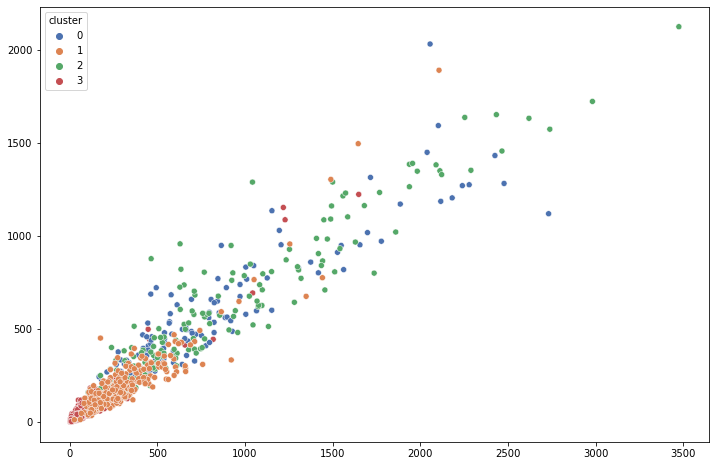

In [39]:
plt.figure(figsize = (12, 8))
sns.scatterplot(x = ex['0-6'] + ex['6-12'] + ex['12-18'] + ex['18-24'], y = ex['Workdays'] + ex['Weekend'], hue = ex['cluster'], palette="deep")

In [189]:
from sklearn.cluster import KMeans

In [190]:
mod = KMeans(n_clusters = 4)

In [191]:
X = ex.drop(['guid', 'cluster', 'Workdays', 'Weekend'], axis = 1)

In [192]:
mod.fit(X)

KMeans(n_clusters=4)

In [193]:
mod.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2,

In [194]:
mod.predict(X[X.index == 645])

array([2])

In [195]:
X['cluster'] = mod.labels_

In [196]:
X[X['cluster'] == 3]

,0-6,6-12,12-18,18-24,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,cluster
22,0,353,461,414,183.119093,264.544190,293.732297,346.466732,0.000000,0.000000,0.000000,3
237,243,316,208,276,231.855800,198.364780,126.791040,137.052959,0.000000,0.000000,0.000000,3
400,24,538,530,126,366.168778,255.478009,272.294230,259.989371,0.000000,0.000000,0.000000,3
418,0,275,722,307,116.179042,203.166869,63.907666,104.592434,126.282001,103.894679,111.033937,3
424,0,190,237,415,69.415339,104.142260,29.401294,76.121991,65.789674,82.911485,222.319159,3
...,...,...,...,...,...,...,...,...,...,...,...,...
822,17,341,460,147,149.887125,124.066105,162.836951,96.008434,77.633627,28.324001,9.949261,3
907,424,505,54,458,176.245570,152.094839,147.026591,159.726685,140.995142,0.000000,0.000000,3
936,14,619,505,210,128.535024,168.263898,129.543043,165.411404,84.142647,0.000000,0.000000,3
945,0,304,271,289,158.458195,123.500473,82.406447,156.790854,57.404995,0.000000,14.591954,3


In [197]:
X.groupby('cluster').count()

,0-6,6-12,12-18,18-24,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
cluster,,,,,,,,,,,
0,36,36,36,36,36,36,36,36,36,36,36
1,604,604,604,604,604,604,604,604,604,604,604
2,269,269,269,269,269,269,269,269,269,269,269
3,91,91,91,91,91,91,91,91,91,91,91


In [200]:
import numpy as np

In [ ]:

    X['0-6'] + X['6-12'] + X['12-18'] + X['18-24']

In [208]:
X['work_mean'] = (X['Monday'] + X['Tuesday'] + X['Wednesday'] + X['Thursday'] + X['Friday'])/5
X['weekend_mean'] = (X['Saturday'] + X['Sunday'])/2

In [209]:
X

,0-6,6-12,12-18,18-24,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,cluster,work_mean,weekend_mean
0,46,45,27,77,70.679831,15.832818,0.000000,7.631819,3.553104,45.290931,0.000000,1,19.539515,22.645466
1,0,18,26,26,0.000000,0.000000,0.000000,0.000000,15.105621,0.000000,81.509906,1,3.021124,40.754953
2,0,0,4,5,0.000000,0.000000,2.757436,0.000000,0.000000,0.000000,6.826536,1,0.551487,3.413268
3,30,33,127,81,0.000000,0.000000,0.000000,0.000000,148.568407,0.000000,50.841149,1,29.713681,25.420575
4,0,93,20,53,57.040458,54.717719,0.000000,0.000000,21.382198,0.000000,0.000000,1,26.628075,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,110,71,106,46.941291,28.368314,24.014769,38.485506,23.697915,45.058121,9.677679,1,32.301559,27.367900
996,10,25,212,105,13.507696,19.856655,31.308892,36.288551,18.303549,8.680940,41.985769,2,23.853069,25.333354
997,0,11,68,38,3.782481,3.782481,8.138587,14.075315,6.332875,10.508105,1.480357,1,7.222348,5.994231
998,0,63,129,113,28.236235,9.144705,27.551402,49.853173,24.617456,8.683298,7.176431,1,27.880594,7.929864


<AxesSubplot:xlabel='work_mean', ylabel='weekend_mean'>

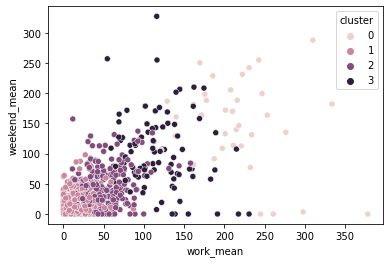

In [211]:
sns.scatterplot(x = X['work_mean'],
               y = X['weekend_mean'], hue = X['cluster'])